# Data Ted
## Analisi dei Ted Talk sul COVID-19
---
#### Matano Francesco S5253162
#### Vassallo Edoardo S4965918 

## Introduzione
> ### Nel nostro progetto di Introduzione alla Data Science abbiamo deciso di controllare l'evoluzione del numero di view e di like sui vari argomenti: COVID, climate altri (da aggiungere dopo) contenuti nei titoli dei ted talk.

# Codice
> ## Librerie importate


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import sklearn
import re

> ## Funzioni utilizzate per il notebook

In [2]:
def print_stats_field(df, field):
    print("---------------------------------------")
    print("Statics statics data of field: ", field)
    print("---------------------------------------")
    print("mean:   ",  df[field].mean()  )
    print("std:    ",  df[field].std()   ) 
    print("var:    ",  df[field].var()   )
    print('mode:   ',  df[field].mode()[0]  )
    print('median: ',  df[field].median())
    print("---------------------------------------")

In [3]:
def show_online_video(df, groubByTitle):
    df.groupby(daTed.date.dt.year)['title'].count().plot( kind='bar', 
                                                             figsize=(10, 5), 
                                                             ylabel="video", 
                                                             xlabel="anno", 
                                                             title= groubByTitle
                                                           )

In [29]:
def all_dim_olap(olap_df, xlabel, ylabel, name_list):
    plt.figure(figsize=(20, 10))
    for x in range(0, len(name_list)):
        plt.figure()
        plt.title(name_list[x])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.imshow(olap_df[:, :, x])
        plt.colorbar()
    plt.show()

In [30]:
theme_list = ["climate", "COVID", "health", "war"]
quantize_date = ['70\'s', '80\'s','90\'s','00\'s','10\'s', '20\'s']
quantize_views = ['<10K', '10K-100K','100K-500K','500K-1M','1M-20M', '>20M']
quantize_likes = ['<10K', '10K-100K','100K-500K','500K-1M', '>1M']

---

# Import e Stampa del Dataset utilizzato nel progetto

In [5]:
daTed = pd.read_csv("data_ted.csv") # data_ted.csv")

In [6]:
daTed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


## 0. Objectives
> ###  Visualizzazione e studio dei TED Talk sul COVID-19 

## 1. Spring Cleaning
> + #### Substitute Nan author with Ted (1 row)
> + #### Debby Millman 2020 June correct date
> + #### Innovations in sleep 2020 July
> + #### Verdere se il formato della data nei campi è corretto

> + ##### Substitute Nan author with Ted (1 row)

In [7]:
i = daTed['author'].isnull()
daTed['author'] = np.where(daTed['author'].isnull() == True, 'Ted',  daTed['author'])

> + ##### Debby Millman 2020 June correct date

In [8]:
daTed.loc[(daTed['author'] == 'Debbie Millman') & (daTed['date'] == 'January 1970'), 'date'] = 'June 2020'
daTed.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


> + ##### Innovations in sleep 2020 July

In [9]:
daTed.loc[(daTed['title'] == 'Innovations in sleep') & (daTed['date'] == 'January 1970'), 'date'] = 'July 2020'

> + ##### Verdere se il formato della data nei campi è corretto

In [10]:
daTed["date"] = pd.to_datetime(daTed['date'], format='%B %Y')

## 2.  Looking at the data

> #### Visualizzazione: media, deviazione standard, varianza, moda, mediana del dataset originale

In [11]:
print_stats_field(daTed, 'views')
print_stats_field(daTed, 'likes') 

---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    2061575.9579044117
std:     3567097.765115676
var:     12724186465893.252
mode:    1300000
median:  1300000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    62607.616727941175
std:     107646.76946116687
var:     11587826975.425608
mode:    39000
median:  40500.0
---------------------------------------


> #### Abbiamo poi deciso di prendere i TED talk che contenevano nel nome del titolo uno dei seguenti problemi di attualità: COVID e climate

In [12]:
daClimate = daTed.loc[daTed["title"].str.contains("climate")]
daCovid   = daTed.loc[daTed["title"].str.contains("COVID")]
daHealth   = daTed.loc[daTed["title"].str.contains("health")]
daWar     = daTed.loc[daTed["title"].str.contains("war")]

> #### Controllato le statistiche dei due nuovi dataframe raccolti (climate e COVID), per vedere se questi argomenti 
raccogliessero un numero maggiore di like e di visualizzazioni rispetto alla media

In [13]:
print("--->daClimate")
print_stats_field(daClimate, 'views')
print_stats_field(daClimate, 'likes') 
print("--->daCovid")
print_stats_field(daCovid, 'views')
print_stats_field(daCovid, 'likes') 

--->daClimate
---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    1376275.5813953488
std:     1169497.4493281087
var:     1367724283984.9521
mode:    1200000
median:  1300000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    41930.813953488374
std:     35453.671606598225
var:     1256962830.388509
mode:    39000
median:  39000.0
---------------------------------------
--->daCovid
---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    1087500.0
std:     908274.100756629
var:     824961842105.2632
mode:    1300000
median:  1250000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    33212.45
std:     27644.229340

> #### Scatter plot del numero di view avute nei vari anni del dataframe originale, di quello con solo i titoli contenti la parola COVID e di quelli con la parola climate.

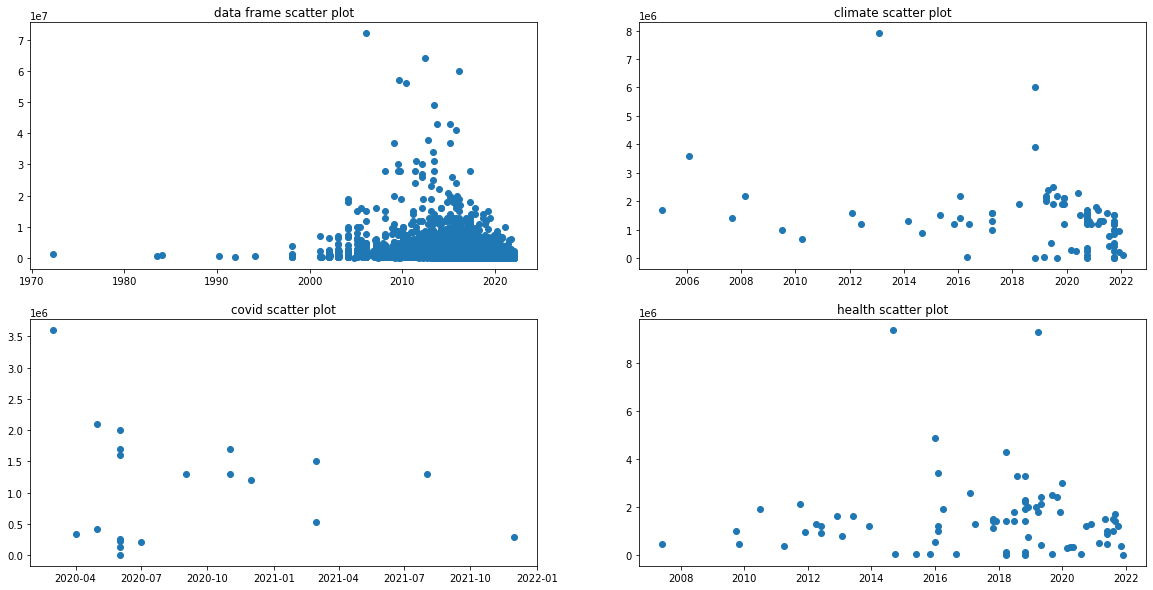

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title("data frame scatter plot")
plt.scatter(daTed["date"].values, daTed["views"].values)

plt.subplot(2, 2, 2)
plt.title("climate scatter plot")
plt.scatter(daClimate["date"].values, daClimate["views"].values)

plt.subplot(2, 2, 3)
plt.title("covid scatter plot")
plt.scatter(daCovid["date"].values, daCovid["views"].values)

plt.subplot(2, 2, 4)
plt.title("health scatter plot")
plt.scatter(daHealth["date"].values, daHealth["views"].values)

plt.show()


> #### Dai due scatter plot visualizzate possiamo notare come il numero di visualizzazioni (e anche di like) col tempo sono aumentate raggiungendo un picco massimo nella decade 2010/2020 

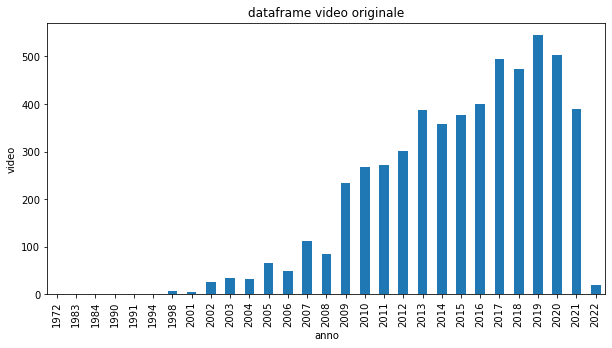

In [15]:
show_online_video(daTed, "dataframe video originale")

#### OLAP


> #### Quantizzazione dei vari dati all'interno del dataset, vengono quantizzate: la data, il numero di visualizzazioni e il numero di like.
> #### Nella tabella di seguito si possono vedere come nel dataframe sono stati creati\aggiunti i seguenti nuovi campi: date_quant, views_quant e likes_quant che hanno l'intento di quantizzare rispettivamente i campi della date, del numero di view e del numero di like.

In [16]:
# Quantizzazione per decade

daTed.loc[daTed['date'].between(pd.to_datetime("1970", format='%Y'), pd.to_datetime("1979", format='%Y'), 'both'), 'date_quant'] = quantize_date[0]
daTed.loc[daTed['date'].between(pd.to_datetime("1980", format='%Y'), pd.to_datetime("1989", format='%Y'), 'both'), 'date_quant'] = quantize_date[1]
daTed.loc[daTed['date'].between(pd.to_datetime("1990", format='%Y'), pd.to_datetime("1999", format='%Y'), 'both'), 'date_quant'] = quantize_date[2]
daTed.loc[daTed['date'].between(pd.to_datetime("2000", format='%Y'), pd.to_datetime("2009", format='%Y'), 'both'), 'date_quant'] = quantize_date[3]
daTed.loc[daTed['date'].between(pd.to_datetime("2010", format='%Y'), pd.to_datetime("2019", format='%Y'), 'both'), 'date_quant'] = quantize_date[4]
daTed.loc[daTed['date'].between(pd.to_datetime("2020", format='%Y'), pd.to_datetime("2029", format='%Y'), 'both'), 'date_quant'] = quantize_date[5]

# Quantizzazione per quantità di views
## p.s. max views: 72M

daTed.loc[daTed['views'].between(0        , 9999    , 'both'), 'views_quant'] = quantize_views[0]
daTed.loc[daTed['views'].between(10000    , 99999   , 'both'), 'views_quant'] = quantize_views[1]
daTed.loc[daTed['views'].between(100000   , 499999  , 'both'), 'views_quant'] = quantize_views[2]
daTed.loc[daTed['views'].between(500000   , 999999  , 'both'), 'views_quant'] = quantize_views[3]
daTed.loc[daTed['views'].between(1000000  , 19999999, 'both'), 'views_quant'] = quantize_views[4]
daTed.loc[daTed['views'].between(20000000 , 80000000, 'both'), 'views_quant'] = quantize_views[5]

# Quantizzazione per quantità di likes
## p.s. max likes: 2.1M

daTed.loc[daTed['likes'].between(0       , 9999    , 'both'), 'likes_quant'] = quantize_likes[0]
daTed.loc[daTed['likes'].between(10000   , 99999   , 'both'), 'likes_quant'] = quantize_likes[1]
daTed.loc[daTed['likes'].between(100000  , 499999  , 'both'), 'likes_quant'] = quantize_likes[2]
daTed.loc[daTed['likes'].between(500000  , 999999  , 'both'), 'likes_quant'] = quantize_likes[3]
daTed.loc[daTed['likes'].between(1000000 , 1000000 , 'both'), 'likes_quant'] = quantize_likes[4]
daTed.head()

,title,author,date,views,likes,link,date_quant,views_quant,likes_quant
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,20's,100K-500K,10K-100K
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,20's,100K-500K,<10K
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,20's,100K-500K,10K-100K
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,20's,100K-500K,10K-100K
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,20's,<10K,<10K


In [17]:
# costruzione OLAP
##OLAP che ha come dimensioni x: le date quantizzate, y: le views quantizzate e z: il nome del tema
THEME_OLAP = np.zeros((len(quantize_date) , len(quantize_views) , len(theme_list)))

for z in range(0, len(theme_list)):
    theme_ted = daTed[daTed['title'].str.contains(theme_list[z])]
    for y in range(0, len(quantize_views)):
        for x in range(0, len(quantize_date)):
            THEME_OLAP[x,y,z] = np.sum(
                            (theme_ted['views_quant'] == quantize_views[y]) 
                            & (theme_ted['date_quant']  == quantize_date[x])
                          )

##OLAP che ha come dimensioni: x: le date quantizzate, y: le views quantizzate e z: il numero di like quantizzati
LIKE_OLAP  = np.zeros((len(quantize_date), len(quantize_views), len(quantize_likes)))

for z in range(0, len(quantize_likes)):
    like_ted = daTed[daTed['likes_quant'] == quantize_likes[z]]
    for y in range(0, len(quantize_views)):
        for x in range(0, len(quantize_date)):
            LIKE_OLAP[x,y,z] = np.sum(
                            (like_ted['views_quant'] == quantize_views[y]) 
                            & (like_ted['date_quant']  == quantize_date[x])
                          )

<Figure size 1440x720 with 0 Axes>

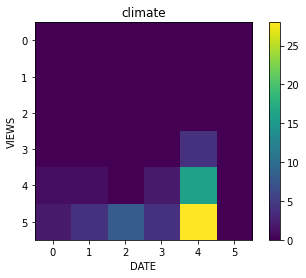

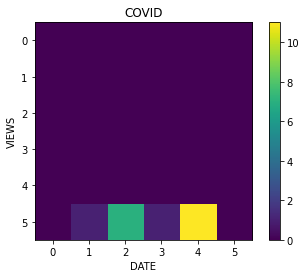

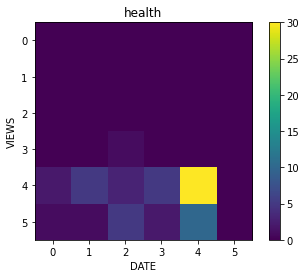

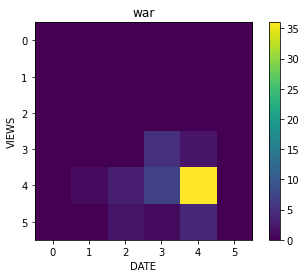

In [18]:
# Visualizziamo la matrice
all_dim_olap(THEME_OLAP, "DATE", "VIEWS", theme_list)

<Figure size 1440x720 with 0 Axes>

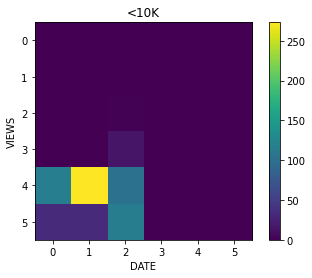

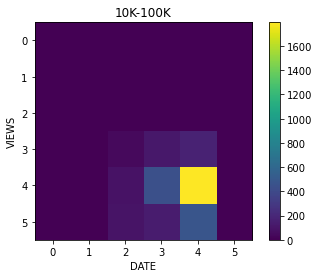

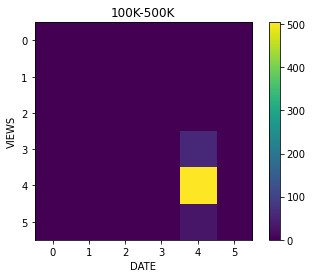

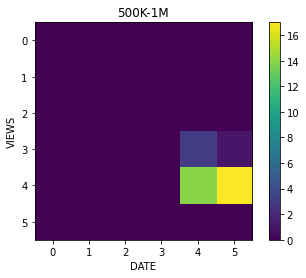

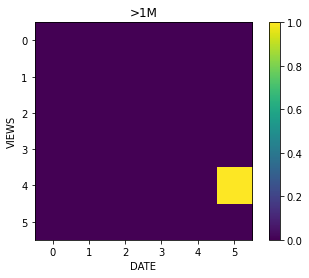

In [19]:
all_dim_olap(LIKE_OLAP, "DATE", "VIEWS", quantize_likes)

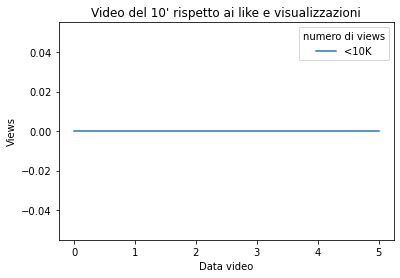

In [20]:
# Slicing
slice_2010 = LIKE_OLAP[:,:,2]

#codice qui 
plt.figure()
plt.title('Video del 10\' rispetto ai like e visualizzazioni')
plt.xlabel('Data video')
plt.ylabel('Views')
plt.plot(slice_2010[:,2])
plt.legend(quantize_views, title="numero di views")

NameError: name 'OLAP' is not defined

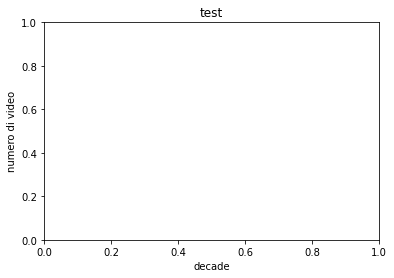

In [21]:
# dicing
plt.title('test')
plt.ylabel('numero di video')
plt.xlabel("decade")
plt.bar(quantize_date, OLAP[:, :, 3])

## 3. Test Statistico

> + #### In questo contesto appliccheremo il T-test per verificare quella che sono le differenze presenti all'interno dei vari dataset creati, in termini di media e di moda.

In [28]:
print("Di seguito sono elencati i risultati dei Ttest condotti sui df: covid, climate health e war")
print("->covid   |", stats.ttest_1samp(daCovid["likes"].values, daTed["likes"].mean()))
print("->climate |", stats.ttest_1samp(daClimate["likes"].values, daTed["likes"].mean()))
print("->health  |", stats.ttest_1samp(daHealth["likes"].values, daTed["likes"].mean()))
print("->war     |", stats.ttest_1samp(daWar["likes"].values, daTed["likes"].mean()))

Di seguito sono elencati i risultati dei Ttest condotti sui df: covid, climate health e war
->covid   | Ttest_1sampResult(statistic=-4.755393265162891, pvalue=0.0001376141284148631)
->climate | Ttest_1sampResult(statistic=-5.408432242633971, pvalue=5.748625214084653e-07)
->health  | Ttest_1sampResult(statistic=-2.9289490180356186, pvalue=0.004487143952274008)
->war     | Ttest_1sampResult(statistic=-2.818451317345767, pvalue=0.006148598668241984)


## 4. Metodo Predittivo


## 5. Clustering